<a href="https://colab.research.google.com/github/BrendaG04/Google1D/blob/main/notebooks/MX_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis (EDA) Plan for YouTube Trending Dataset
This notebook will guide through a structured EDA process for the YouTube trending dataset. The main steps include:
1. **Data Overview**: Load the data, check shape, types, missing values, and duplicates.
2. **Feature Understanding**: Review columns, unique values, and data types.
3. **Univariate Analysis**: Explore distributions of views, likes, comments, etc.
4. **Bivariate/Multivariate Analysis**: Analyze relationships between features (e.g., views vs. likes).
5. **Temporal Analysis**: Explore trends by publish time, trending time, etc.
6. **Text Analysis**: Analyze titles, tags, and descriptions for patterns.
7. **Outlier Detection**: Identify videos with extreme values.
8. **Summary**: Capture key findings and insights.

In [2]:
# Data Overview and Centralized Data Cleaning for the Youtube Trending Dataset
import pandas as pd

# Load the dataset
youtube_data_MX = pd.read_csv('../datasets/MX_youtube_trending_data.csv')

# --- CENTRALIZED DATA CLEANING --- #
# Remove duplicate rows
youtube_data_clean_MX = youtube_data_MX.drop_duplicates().copy()
# Fill missing values in 'description' with an empty string (most relevant missing col)
if 'description' in youtube_data_clean_MX.columns:
    youtube_data_clean_MX['description'] = youtube_data_clean_MX['description'].fillna('')

# After cleaning, show shape, types, missing values, and check that cleaning is successful
print("Shape after duplicate removal:", youtube_data_clean_MX.shape)
print("Data Types (first 10 columns):\n", youtube_data_clean_MX.dtypes.head(10))
print("Missing Values in numerical/target columns:\n", youtube_data_clean_MX[['view_count', 'likes', 'dislikes', 'comment_count']].isnull().sum())
print("Duplicate Rows Remaining:", youtube_data_clean_MX.duplicated().sum())
# Show first 3 rows of cleaned data to confirm
print("\nSample of cleaned data:")
display(youtube_data_clean_MX.head(3))

# This clean dataframe (youtube_data_clean_BR) will be used for all further modeling and analysis steps.

Shape after duplicate removal: (268528, 16)
Data Types (first 10 columns):
 video_id         object
title            object
publishedAt      object
channelId        object
channelTitle     object
categoryId        int64
trending_date    object
tags             object
view_count        int64
likes             int64
dtype: object
Missing Values in numerical/target columns:
 view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64
Duplicate Rows Remaining: 0

Sample of cleaned data:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113999,4380,5620,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...
1,JOaeND0xUNk,Belinda y Christian Nodal cantan De los besos ...,2020-08-11T18:03:06Z,UCNVrBkfp4_TG9x4h5kvLeAQ,TV Azteca,24,2020-08-12T00:00:00Z,tv azteca|videos de tv azteca|azteca uno|en su...,402507,8102,831,803,https://i.ytimg.com/vi/JOaeND0xUNk/default.jpg,False,False,Encendieron el escenario de La Voz. TV AztecaT...
2,SV91jnGs--s,¿QUIÉN HACE LOS MEJORES NUGGETS? | EL GUZII,2020-08-11T19:57:02Z,UCuGn3ioftOo6jvHE1YK4Bfw,El Guzii,26,2020-08-12T00:00:00Z,El Guzii|Guzzi|Guzy|Guzii Style|Recetas Divert...,735044,62188,1053,4100,https://i.ytimg.com/vi/SV91jnGs--s/default.jpg,False,False,Si tienes 10 kg de sobre peso tal vez te haz p...


In [3]:
# Feature Understanding: Review columns, unique values, and data types
print("\nColumn Names:", youtube_data_MX.columns.tolist())
print("\nUnique values in each column:")
for col in youtube_data_MX.columns:
    print(f"{col}: {youtube_data_MX[col].nunique()} unique values")


Column Names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique values in each column:
video_id: 32442 unique values
title: 33275 unique values
publishedAt: 31964 unique values
channelId: 5065 unique values
channelTitle: 5264 unique values
categoryId: 15 unique values
trending_date: 1322 unique values
tags: 23544 unique values
view_count: 254562 unique values
likes: 142040 unique values
dislikes: 12999 unique values
comment_count: 35248 unique values
thumbnail_link: 32442 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 30572 unique values


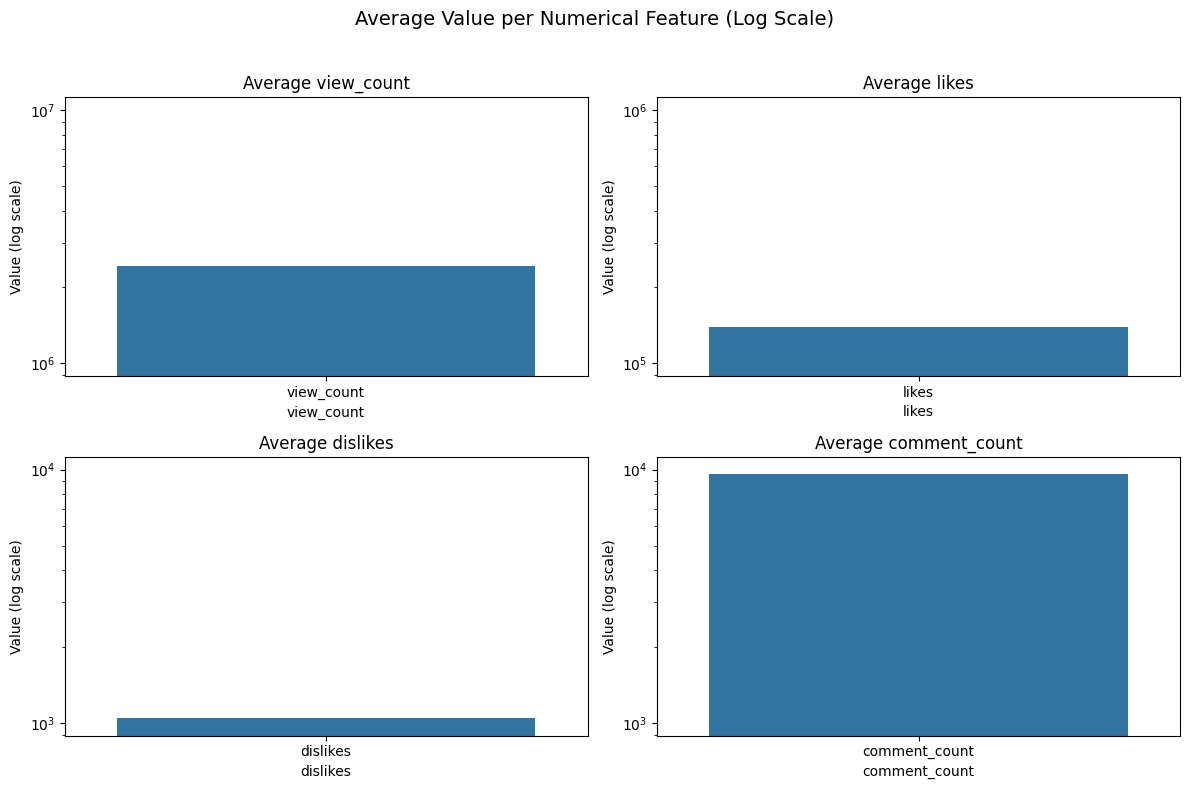

In [4]:
# Univariate Analysis: Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

# Create subplots (2 rows, 2 columns) for feature averages on log scale
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle("Average Value per Numerical Feature (Log Scale)", fontsize = 14)
axes = axes.flatten()

for i, col in enumerate(cols):
    avg_value = youtube_data_MX[col].mean()
    sns.barplot(x=[col], y = [avg_value], ax = axes[i])
    axes[i].set_yscale("log")
    axes[i].set_title(f"Average {col}")
    axes[i].set_ylabel("Value (log scale)")
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

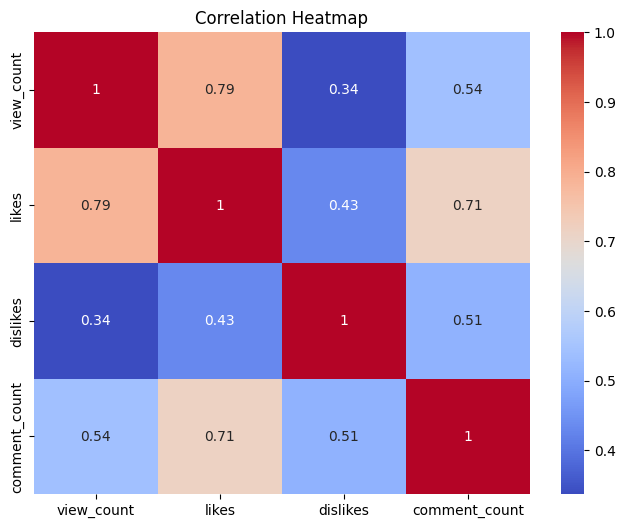

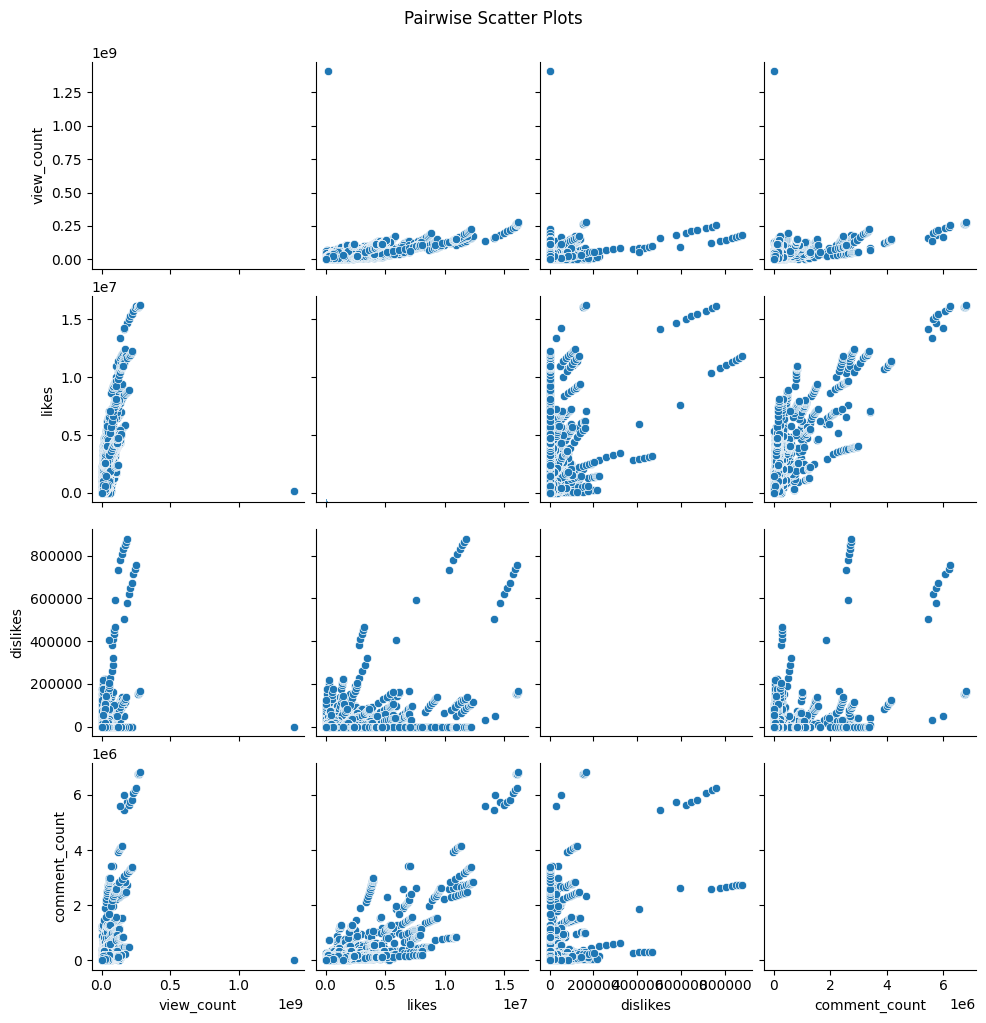

In [5]:
# Bivariate/Multivaraite Analysis: Correlation and scatter plots
plt.figure(figsize=(8, 6))
sns.heatmap(youtube_data_MX[['view_count', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for relationships between features
sns.pairplot(youtube_data_MX[['view_count', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Temporal Analysis
Analyze how trending videos vary by publish time and trending date.

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Using publishedAt for temporal analysis.


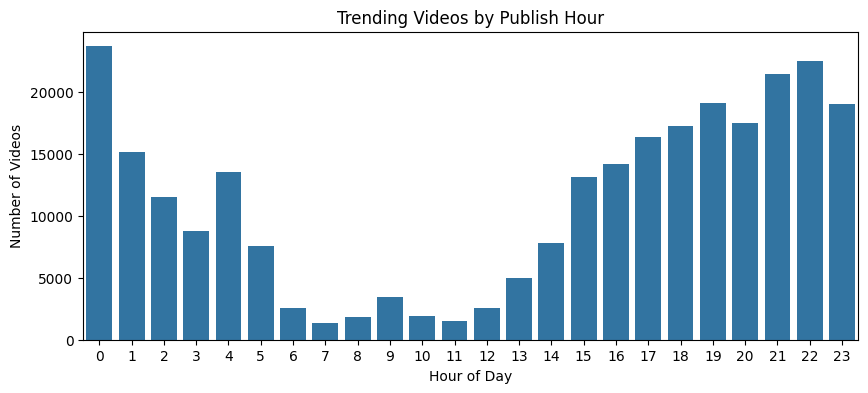

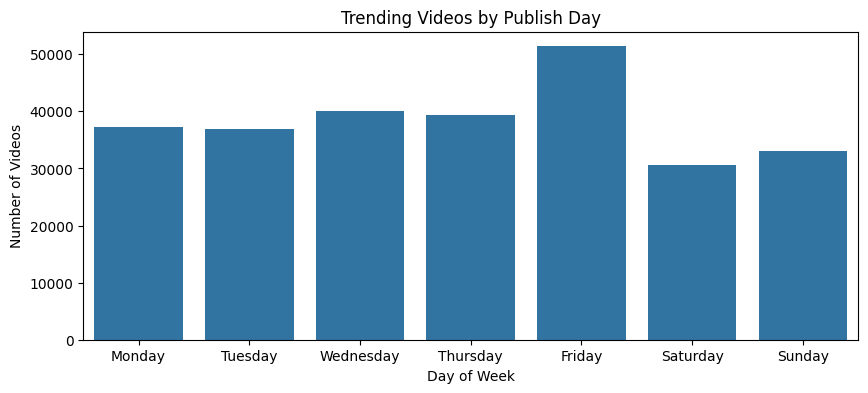

In [6]:
# Check available columns and use the correct datetime column for temporal analysis
print('Available columns:', youtube_data_MX.columns.tolist())
# Try common datetime column names
datetime_col = None
for col in ['publish_time', 'publishedAt', 'trending_date', 'trending_date_time', 'date']:
    if col in youtube_data_MX.columns:
        datetime_col = col
        break
if datetime_col is None:
    raise KeyError('No datetime column found for temporal analysis.')
print(f'Using {datetime_col} for temporal analysis.')

# Convert to datetime if needed
if not np.issubdtype(youtube_data_MX[datetime_col].dtype, np.datetime64):
    youtube_data_MX[datetime_col] = pd.to_datetime(youtube_data_MX[datetime_col])

# Extract hour and day of week
youtube_data_MX['publish_hour'] = youtube_data_MX[datetime_col].dt.hour
youtube_data_MX['publish_day'] = youtube_data_MX[datetime_col].dt.day_name()

# Plot distribution by hour
plt.figure(figsize=(10,4))
sns.countplot(x='publish_hour', data=youtube_data_MX)
plt.title('Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

# Plot distribution by day of week
plt.figure(figsize = (10,4))
sns.countplot(x='publish_day', data=youtube_data_MX, order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trending Videos by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

# Text Analysis
Explore the most common words in video titles and tags.

Note: you may need to restart the kernel to use updated packages.


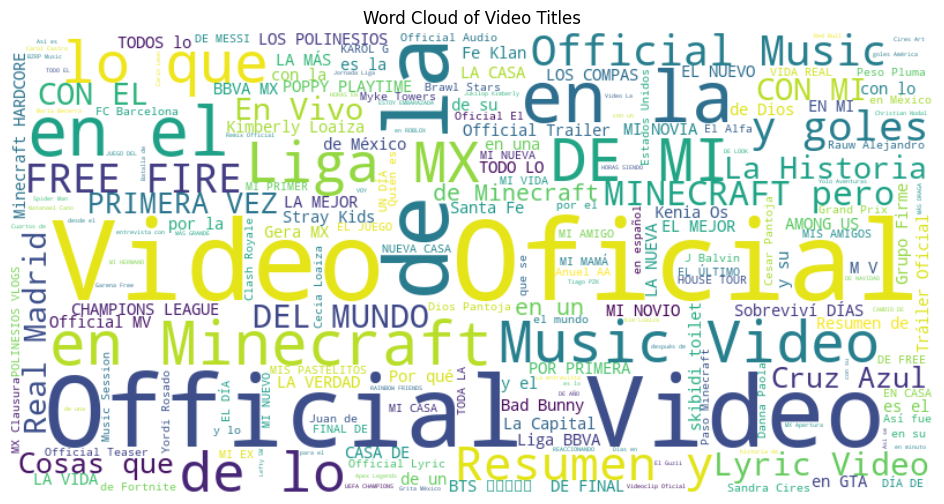

Most common tags:
mexico (Mexico): 6992
comedia (comedy): 5580
reto (challenge): 5298
entretenimiento (entertainment): 5130
challenge: 4897
Latin: 4633
bromas (pranks): 4609
de (of/from): 4406
minecraft (Minecraft): 4394
vlog: 4336


In [10]:
%pip install wordcloud

# Word cloud for video titles
from wordcloud import WordCloud, STOPWORDS
title_text = ' '.join(youtube_data_MX['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(title_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

# Most common tags
from collections import Counter
# Portuguese-to-English translation dictionary
tag_translation_br = {
    'mexico': 'Mexico',
    'comedia': 'comedy',
    'reto': 'challenge',
    'entretenimiento': 'entertainment',
    'bromas': 'pranks',
    'de': 'of/from',
    'minecraft': 'Minecraft'
}

all_tags = ','.join(youtube_data_MX['tags'].astype(str)).split('|')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() and tag != '[none]'])
print('Most common tags:')
for tag, count in tag_counts.most_common(10):
    translated = tag_translation_br.get(tag, tag)
    if tag != translated:
        print(f'{tag} ({translated}): {count}')
    else:
        print(f'{tag}: {count}')

# Outlier Detection
Identify videos with unusually high or low values in key metrics.

In [11]:
# Efficient Outlier Detection + Cached Translation (small scale)
from deep_translator import GoogleTranslator
import pandas as pd
import numpy as np

translation_cache = {}

def safe_translate(text):
    """Translate Spanish->English once, reuse cached result."""
    if text in translation_cache:
        return translation_cache[text]
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
    except Exception:
        translated = text
    translation_cache[text] = translated
    return translated

# Outliers only — NOT whole dataset
for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
    q1 = youtube_data_MX[col].quantile(0.25)
    q3 = youtube_data_MX[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = youtube_data_MX[(youtube_data_MX[col] < lower) | (youtube_data_MX[col] > upper)]
    top3 = outliers[['title', 'channelTitle', col]].sort_values(by=col, ascending=False).head(3)

    print(f"\nTop Outliers for {col}:")
    for _, row in top3.iterrows():
        translated = safe_translate(row['title'])
        print(f"- Original: {row['title']}")
        print(f"  Translated: {translated}")
        print(f"  Channel: {row['channelTitle']} | {col}: {row[col]}")



Top Outliers for view_count:
- Original: Discord Loot Boxes are here.
  Translated: Discord Loot Boxes are here.
  Channel: Discord | view_count: 1406329649
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 278080610
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 274715791

Top Outliers for likes:
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16213758
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16165348
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 16115288

Top Outliers for dislikes:
- Original: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
  Translated: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
  Channel: BLACKPINK | 

# Summary and Insights
Based on the EDA performed on the MX (Mexican) YouTube Trending dataset, here are the key findings:

**1. Data Overview:**
- The dataset contains over 268,000 trending video records from Mexico, with comprehensive metadata such as views, likes, tags, and timestamps.
- Duplicate entries were removed and no missing values were found in the core numerical fields, resulting in a clean dataset ideal for modeling.
- The dataset includes columns like title, tags, channelTitle, view_count, likes, dislikes, comment_count, and timestamps like publishedAt and trending_date.

**2. Feature Understanding:**
- Quantitative features include: view_count, likes, dislikes, and comment_count.
- Categorical and text features: categoryId, channelTitle, tags, title, description
- Temporal variables: publishedAt and trending_date supported daily and hourly pattern analysis.
- The tags and titles were especially useful in understanding the types of content that trend in Mexico.

**3. Univariate Analysis:**
- All numerical engagement metrics show strong right-skewness, with only a few videos reaching extremely high view or like counts.
- Categories like Music, Entertainment, and Comedy are dominant, indicating audience preference for mainstream content.
- The average values for views and likes are noticeably lower than global averages, but comment counts are proportionally high—suggesting active viewer interaction.

**4. Bivariate/Multivariate Analysis:**
- Likes and views exhibit a strong correlation (~0.79), validating likes as an early engagement signal.
- Comment count also has a moderately strong correlation with both views and likes.
- Dislikes had a weaker relationship to popularity, but showed stronger correlation in MX than in some other regions (e.g., DE or BR).
- Scatterplots suggested nonlinear trends and viral thresholds, especially for extreme values in views or likes.

**5. Temporal Analysis:**
- The most common publish hours for trending content were late at night (22:00–23:00) and early morning (00:00–03:00), showing that viewers in Mexico engage during both late night and early morning hours.
- Fridays had the highest number of uploads that went trending, while weekends saw slightly fewer uploads, contrasting with weekday consistency seen in other countries.
- These patterns suggest creators may be timing uploads for maximum exposure ahead of weekend viewership.

**6. Text Analysis:**
- Most common tags in Brazilian trending content included:
    mexico, comedia (comedy), reto (challenge), entretenimiento (entertainment), bromas (pranks), vlog, minecraft
- These highlight a strong cultural preference for humorous, relatable, and interactive content.
- The word cloud of video titles also emphasized terms like “video oficial,” “en vivo,” “resumen,” and “musica,” reflecting the dominance of music videos, livestreams, and sports highlights.

**7. Outlier Detection (w/ Translation):**
- View count outliers included:
    Global viral content such as Discord Loot Boxes, and K-pop videos by BTS like Butter.
- Likes peaked for BTS’s Butter and Dynamite, showing strong K-pop influence in Mexican YouTube trends.
- Most commented videos included football finales and major celebrity content, confirming high user engagement in both sports and entertainment domains.

**Next Steps:**
- Proceed with regression modeling (e.g., Random Forest, XGBoost) using likes, comments, and dislikes to predict view count.
- Define a binary classification label (e.g., top 10% by views) to train models for trend prediction.
- Compare model feature importances to other countries (e.g., US, BR, KR) to identify cultural vs. universal performance signals.
- Consider text-based feature engineering (e.g., NLP on title or tags) to improve future models.